In [1]:
import numpy as np
from numpy import sin,cos,pi
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp # import the ordinary differential equation integrator in Python
plt.style.use('fivethirtyeight')

# Homework #5

![Whirling Roller-coaster](../images/roller_coaster.svg)

A roller coaster is being designed on a parabolic track that rotates at a constant
speed as seen in the figure above. Assume the cart rolls on the track as a frictionless
point-mass of 100-kg. Determine the equations of motion in terms of the distance from the
lowest point, $q_1=x_2$. 

  a. What is the kinetic energy of the cart?

  b. What is the potential energy of the cart?

  c. What is the equation of motion for the cart?

## 1. Create a function, `cart_ode`, that represents the equation of motion for the car in terms of $x_2$

In [2]:
def cart_ode(t,r,w):
    '''
    cart_ode(t,r,w)
    
    Set of 2 ODEs that return dx2/dt and d^2x2/dt^2 with input
    x2 and dx2/dt, dr/dt = f(t,r)
    Parameters
    ----------
    t: current time
    r: current state [x, dx]
    w: system rotation rate [rad/s]
    Returns
    -------
    dy: derivative of current state [dx, ddx]
    '''
    dr=np.zeros(np.shape(r))
    dr[0] = r[1]
    dr[1] = (r[0]*w**2 - r[1]**2*r[0] - 9.81*r[0])/(1 + r[0]**2)
    return dr

## 2. Solve the `cart_ode` initial value problem for x(0)=10 m, dx/dt(0)=0 m/s and $\omega$=0 rad/s

In [3]:
x0=10
v0=0
w=0 # rad/s
end_time=10 # choose an end time that displays one full period

r0 = solve_ivp(lambda t,r: cart_ode(t,r,w),[0, end_time],[x0,v0])

## 3. Solve the `cart_ode` initial value problem for x(0)=3 m, dx/dt(0)=0 m/s and $\omega$=1 rad/s

In [4]:
x0=10
v0=0
w=3
end_time=10 # choose an end time that displays one full period

r1 = solve_ivp(lambda t,r: cart_ode(t,r,w),[0, end_time],[x0,v0])

## 4. Solve the `cart_ode` initial value problem for x(0)=3 m, dx/dt(0)=0 m/s and $\omega$=2 rad/s

In [5]:
x0=10
v0=0
w=6
end_time=10 # choose an end time that displays one full period

r2 = solve_ivp(lambda t,r: cart_ode(t,r,w),[0, end_time],[x0,v0])

## 5. Plot the three solutions together

Text(0, 0.5, 'velocity (m/s)')

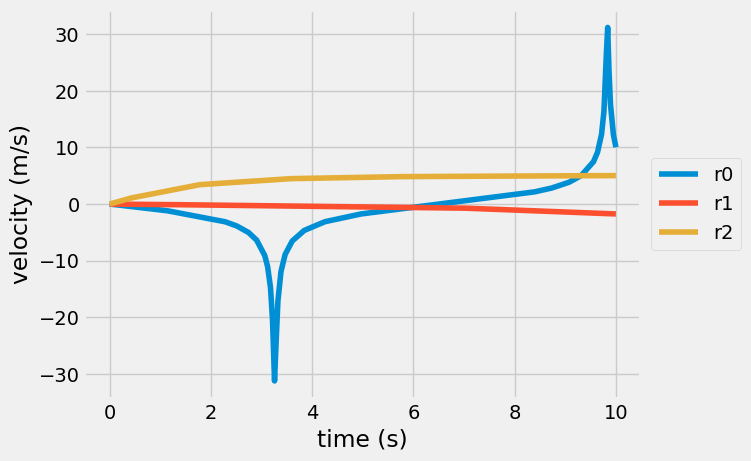

In [12]:
plt.plot(r0.t, r0.y[1], label='r0')
plt.plot(r1.t, r1.y[1], label='r1')
plt.plot(r2.t, r2.y[1], label='r2') # <-------------- your new plot, convert rad to deg with 180/pi
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

Text(0, 0.5, 'position (m)')

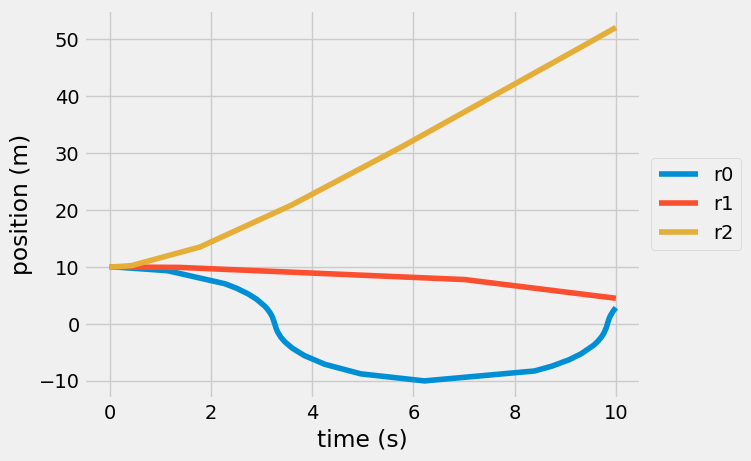

In [13]:
plt.plot(r0.t, r0.y[0], label='r0')
plt.plot(r1.t, r1.y[0], label='r1')
plt.plot(r2.t, r2.y[0], label='r2') # <-------------- your new plot, convert rad to deg with 180/pi
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('time (s)')
plt.ylabel('position (m)')